# Import Dependencies

In [2]:
import torch 
from astroNN.datasets.galaxy10 import galaxy10cls_lookup  
import h5py
import numpy as np
import os
import wget
from sklearn.model_selection import train_test_split
from PIL import Image
from matplotlib import cm
import matplotlib.pyplot as plt
import random
from PIL import Image as im
import shutil

WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


# Set Paths and Variables

In [3]:
DATA_PATH  = "S:/galaxydata/data" #Change this path to where you want to store all galaxy images
IMAGES_PATH = os.path.join(DATA_PATH, "full")
TRAIN_PATH = os.path.join(DATA_PATH, "train")
TEST_PATH = os.path.join(DATA_PATH, "test")

#Change this variable to change percentage of original dataset (number between 0.01 and 1)
dataset_size = 0.9 #multiply by 100 to get percentage. 

# Download Astronomy Image Dataset from Link

In [3]:
#Change data path for your device. Requires 2.6 GB of space available
DOWNLOAD_PATH = "S:/galaxydata/Galaxy10_DECals.h5"
if not os.path.isfile(DOWNLOAD_PATH):
    wget.download("https://www.astro.utoronto.ca/~hleung/shared/Galaxy10/Galaxy10_DECals.h5", DOWNLOAD_PATH)

with h5py.File(DOWNLOAD_PATH, 'r') as f:
    images = np.array(f['images'])
    labels = np.array(f['ans'])

In [4]:
classes = []
for i in range(10):
    classes.append(galaxy10cls_lookup(i))

In [5]:
print(len(images))

17736


# Visualize galaxy images

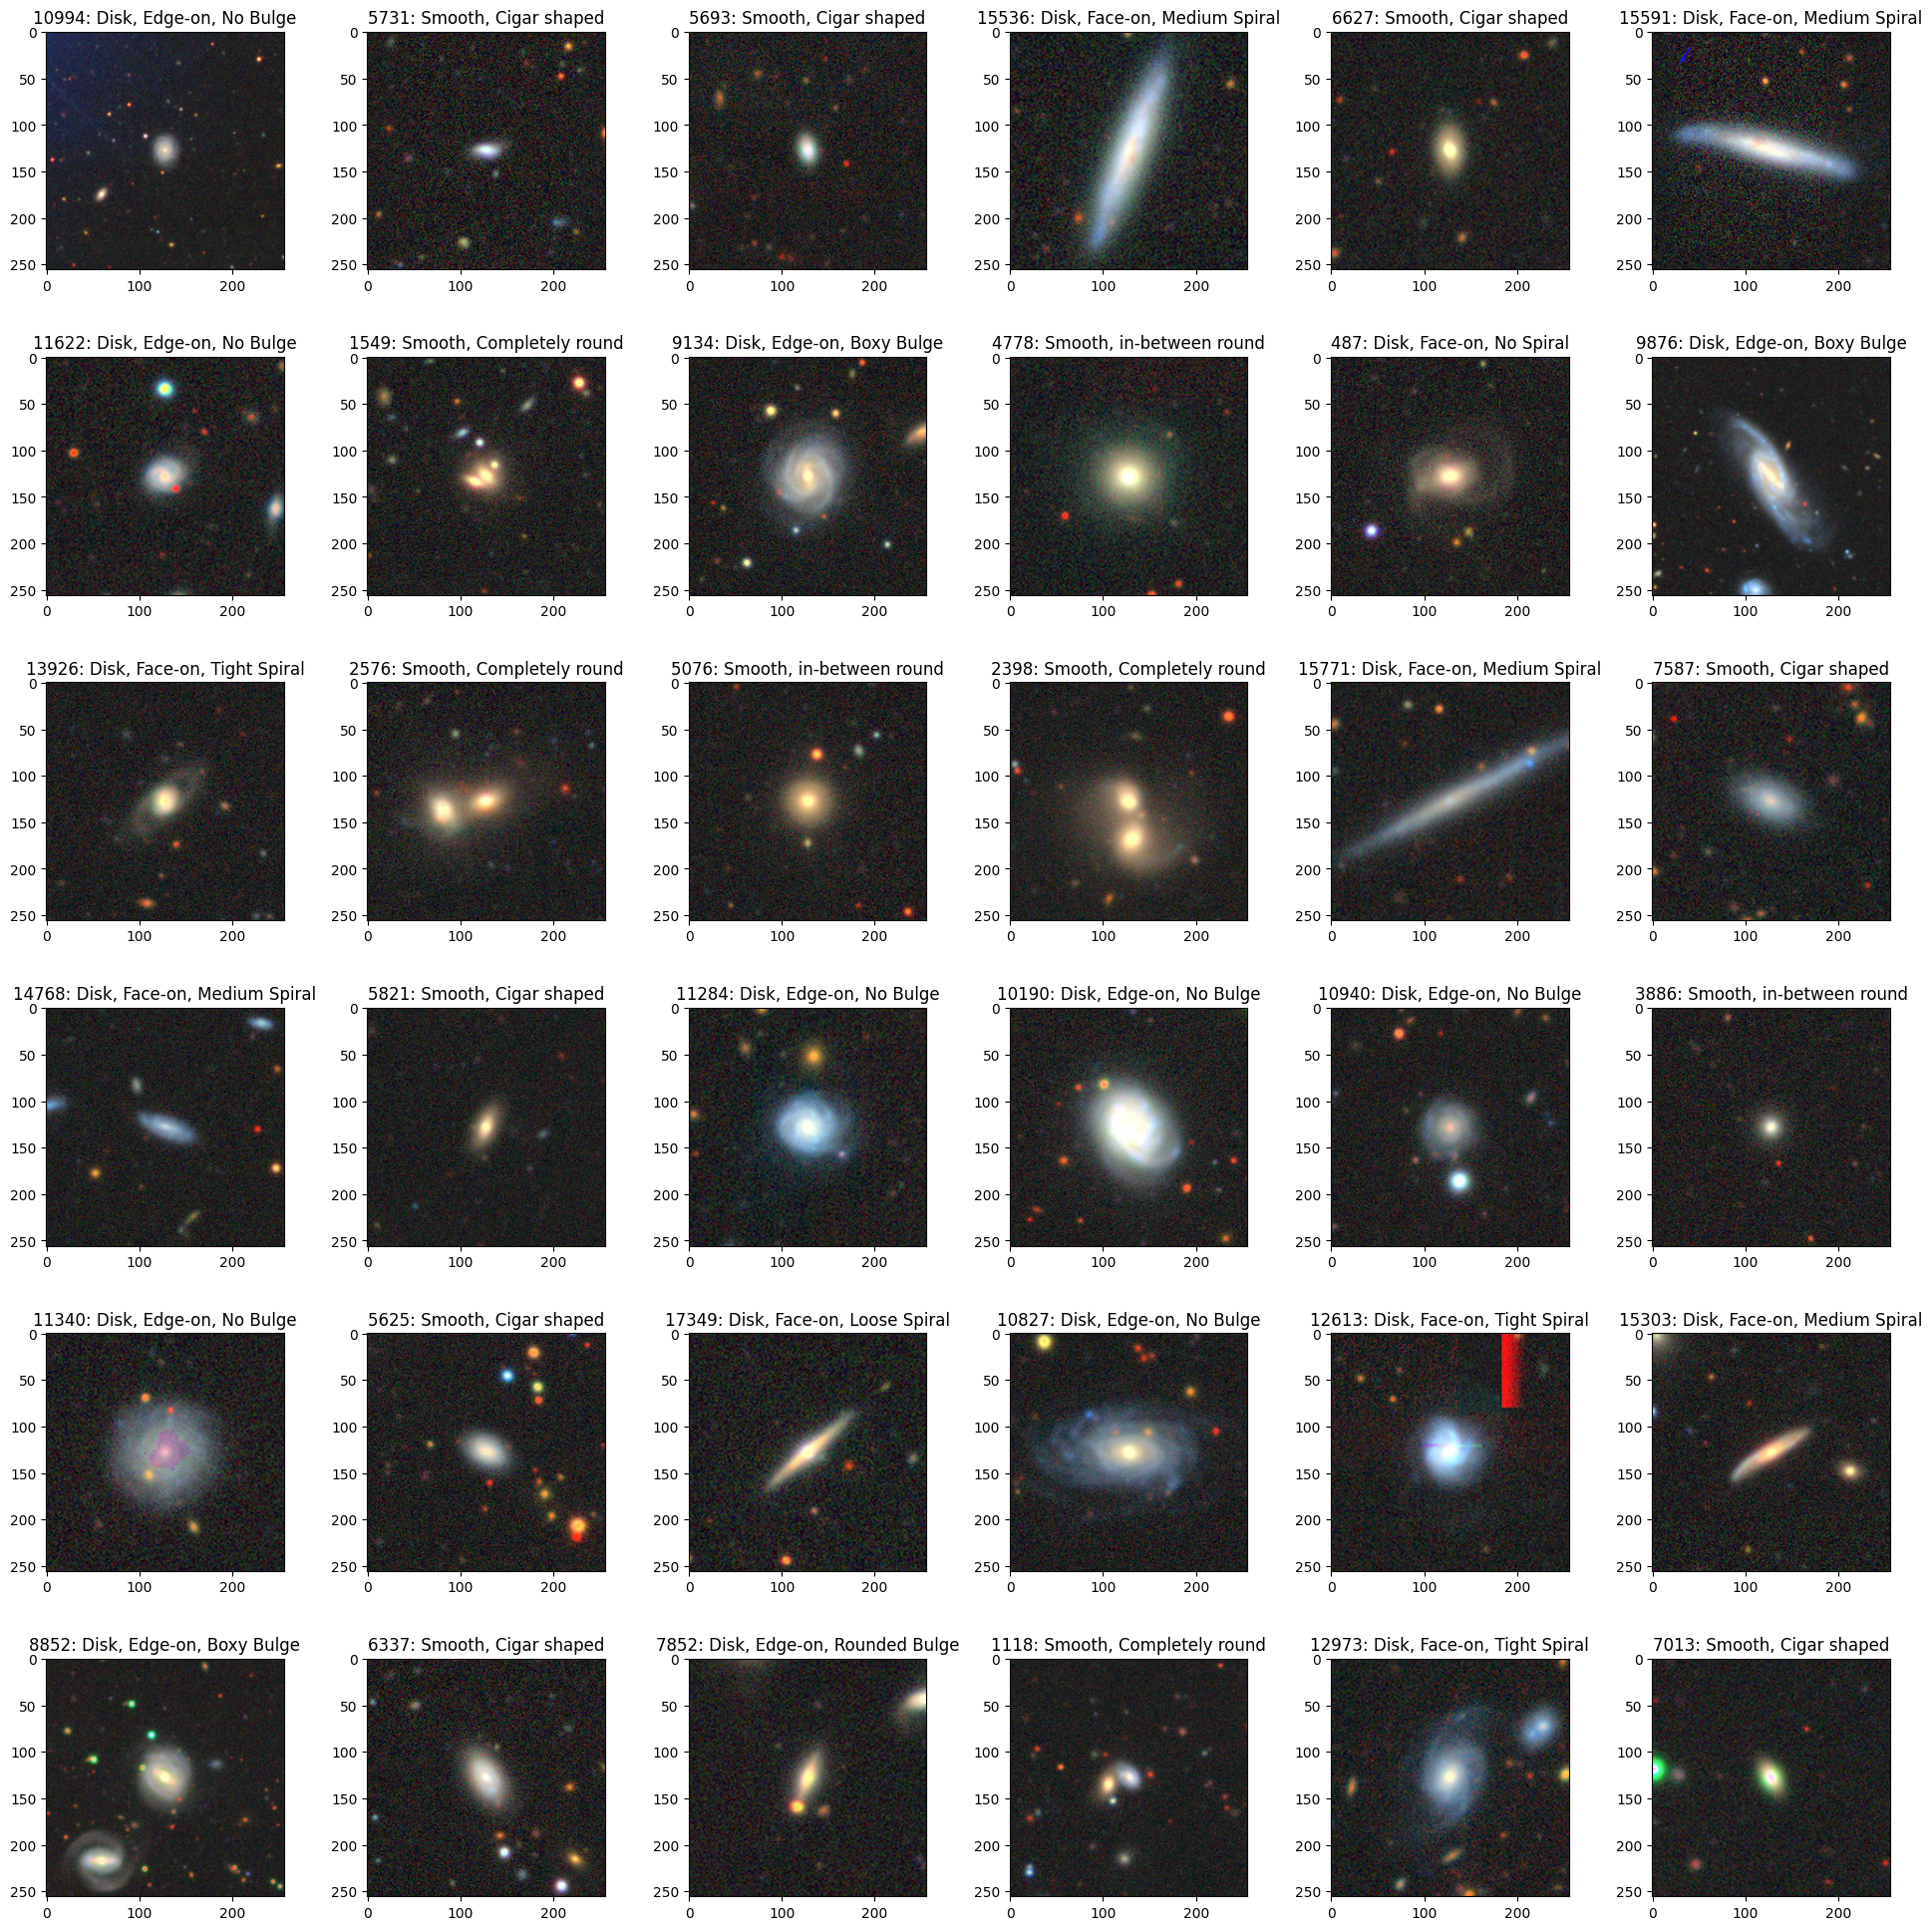

In [28]:
fig = plt.figure(figsize=(20,20)) 
for i in range(36):
    num = random.randrange(0, len(images))
    plt.subplot(6,6,i+1)    
    plt.imshow(images[num])
    plt.title(str(num) + ": " + classes[labels[num]] )
    fig.tight_layout(pad=3.0)
    
plt.show()

8418: Disk, Edge-on, Boxy Bulge


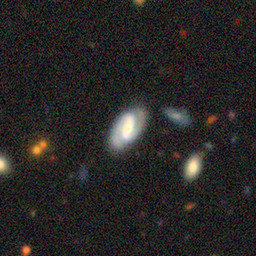

In [29]:
rand = random.randrange(0, len(images)) #gets random galaxy image

numpy_image = images[rand]
PIL_image = Image.fromarray(np.uint8(numpy_image)).convert('RGB')
print(str(rand) + ": " + classes[labels[rand]])

PIL_image

# Create Folders for Data

In [30]:
if not os.path.isdir(DATA_PATH):
    os.mkdir(DATA_PATH)
    os.mkdir(TRAIN_PATH)
    os.mkdir(TEST_PATH)
    os.mkdir(IMAGES_PATH)

    for i in classes:
        os.mkdir(os.path.join(TRAIN_PATH, str(i)))
        os.mkdir(os.path.join(TEST_PATH, str(i)))
        os.mkdir(os.path.join(IMAGES_PATH, str(i)))

In [31]:
#Get class names 
classes

['Disk, Face-on, No Spiral',
 'Smooth, Completely round',
 'Smooth, in-between round',
 'Smooth, Cigar shaped',
 'Disk, Edge-on, Rounded Bulge',
 'Disk, Edge-on, Boxy Bulge',
 'Disk, Edge-on, No Bulge',
 'Disk, Face-on, Tight Spiral',
 'Disk, Face-on, Medium Spiral',
 'Disk, Face-on, Loose Spiral']

In [32]:
#Get number of instances per class
unique, counts = np.unique(labels, return_counts=True)
print(np.asarray((classes, counts)).T)

[['Disk, Face-on, No Spiral' '1081']
 ['Smooth, Completely round' '1853']
 ['Smooth, in-between round' '2645']
 ['Smooth, Cigar shaped' '2027']
 ['Disk, Edge-on, Rounded Bulge' '334']
 ['Disk, Edge-on, Boxy Bulge' '2043']
 ['Disk, Edge-on, No Bulge' '1829']
 ['Disk, Face-on, Tight Spiral' '2628']
 ['Disk, Face-on, Medium Spiral' '1423']
 ['Disk, Face-on, Loose Spiral' '1873']]


# Save images to folders created. 

### Takes 2 parameters: 
#### images: takes image arrays from Galaxy_DECals.h5 file
#### labels: takes labels from Galaxy_DECals.h5 file


In [35]:
def save_all_images(images, labels):
    for i in range(len(images)):
        label = classes[labels[i]]
        image = Image.fromarray(images[i].astype('uint8'), 'RGB')
        image = image.save(os.path.join(IMAGE_PATH, label, str(i) + ".jpg"))
        
    
    subfolders = []
    for subdir, dirs, files in os.walk(IMAGE_PATH):
        subfolders.append(subdir)
    
    subfolders = subfolders[1:] #excludes main directory from subdirectory list
    for i in subfolders:
        lst = os.listdir(i)
        train_images, test_images= train_test_split(lst, test_size=0.2)
        path, label = os.path.split(i)
        for train in train_images:
            image = im.open(f"{i}" + "/" + train)
            image = image.save(os.path.join(TRAIN_PATH, label, train))
        for test in test_images:
            image = im.open(f"{i}" + "/" + test)
            image = image.save(os.path.join(TEST_PATH, label, test))
    shutil.rmtree(IMAGE_PATH)
# save_all_images(images, labels)

### Takes 3 parameters: 
#### images: takes image arrays from Galaxy_DECals.h5 file
#### labels: takes labels from Galaxy_DECals.h5 file
#### final_percent: percent of original dataset desired (e.g 0.9 for 90%, 0.8 for 80%, etc)

In [36]:
def save_percent_of_images(images, labels, final_percent:float):
    percent = 1 - final_percent
    for i in range(len(images)):
        label = classes[labels[i]]
        image = Image.fromarray(images[i].astype('uint8'), 'RGB')
        image = image.save(os.path.join(IMAGES_PATH, label, str(i) + ".jpg"))
        
    
    subfolders = []
    for subdir, _, _ in os.walk(IMAGES_PATH):
        subfolders.append(subdir)
    
    subfolders = subfolders[1:] #excludes main directory from subdirectory list
    for i in subfolders:
        lst = os.listdir(i)
        all_images, _ = train_test_split(lst, test_size=percent)
        train_images, test_images = train_test_split(all_images, test_size=0.2)
        path, label = os.path.split(i)
        for train in train_images:
            image = im.open(f"{i}" + "/" + train)
            image = image.save(os.path.join(TRAIN_PATH, label, train))
        for test in test_images:
            image = im.open(f"{i}" + "/" + test)
            image = image.save(os.path.join(TEST_PATH, label, test))
    shutil.rmtree(IMAGES_PATH)

In [37]:
save_percent_of_images(images, labels, dataset_size) # 90% of original dataset

In [38]:
def delete_label(label: str):
    shutil.rmtree("S:/galaxydata/data/train/" + label)
    shutil.rmtree("S:/galaxydata/data/test/" + label)

delete_label("Disk, Edge-on, Rounded Bulge")

We incorporate an 80/20 split for train/test datasets by multiplying num by 0.8 and 0.2, respectively.

We delete the Disk, Edge-on, Rounded Bulge class because of its small size

# Delete all files from specified location and recycle bin (if needed)

In [39]:
# import shutil
# import winshell

# shutil.rmtree(DATA_PATH)
# winshell.recycle_bin().empty(confirm=False, show_progress=False, sound=False)